In [1]:
import IPython.display as ipd
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import sklearn

plt.rcParams['axes.grid'] = False

In [7]:
audio_path = '../data_training/training-a/a0001.wav'
y, sr = librosa.load(audio_path)
print(f'Тип y: {type(y)} sr: {type(sr)}')
print(f'Размер аудиофайла: {y.shape}, {sr}')
print(f'Переменные: {y}, {sr}')

Тип y: <class 'numpy.ndarray'> sr: <class 'int'>
Размер аудиофайла: (786436,), 22050
Переменные: [-0.00204706 -0.00228845 -0.00252952 ... -0.00101112 -0.00060193
  0.        ], 22050


In [ ]:
"""
С помощью IPython.display можно проигрывать аудио в Jupyter Notebook
C помощью display.waveshow() формируются звуковые волны и мы можем посмотреть, как выглядит звук
"""

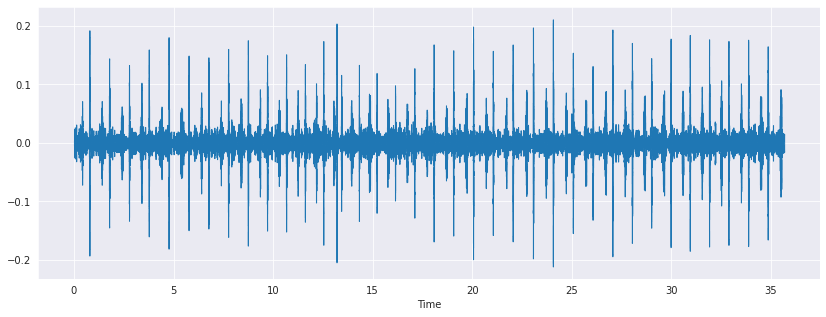

In [7]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
ipd.Audio(audio_path)

In [ ]:
"""
Разделение гармонических (тональных ) и ударных (переходных) сигналов на две формы волны:
"""

Text(0.5, 1.0, 'Harmonic + Percussive')

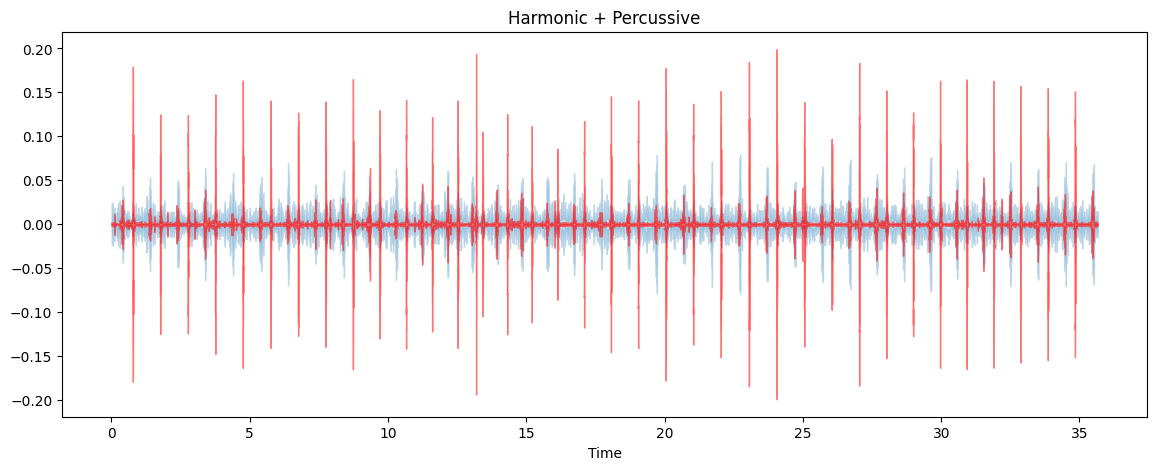

In [8]:
y_harmonic, y_percussive = librosa.effects.hpss(y)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_harmonic, sr=sr, color='r', alpha=0.25)
librosa.display.waveshow(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')

In [ ]:
"""
Результатом является то, что временной ряд y был разделен на два временных ряда, содержащих гармоническую и перкуссионную части сигнала.
Каждый из y_harmonic и y_percussive имеет ту же форму и продолжительность, что и y
"""

In [ ]:
"""
Нормализованная энергия цветности - Chroma Energy Normalized (CENS)


Функции цветности основаны на двенадцати атрибутах написания основного тона, как используется в западной нотной записи, где каждый вектор цветности указывает, как энергия в кадре сигнала распределяется по двенадцати полосам цветности. Измерение таких распределений во времени дает представление времени и цветности (или хромаграмму ), которое тесно коррелирует с мелодической и гармонической прогрессией. Такие последовательности часто схожи для разных записей одного и того же. Нормализованная энергия цветности применяется для сопоставления звука, где допускаются вариации, поскольку они обычно появляются в разных исполнениях . Например, два разных исполнения
 одного и того же, могут демонстрировать значительные нелинейные глобальные и локальные различия в темпе,
 артикуляции и фразировке.
"""

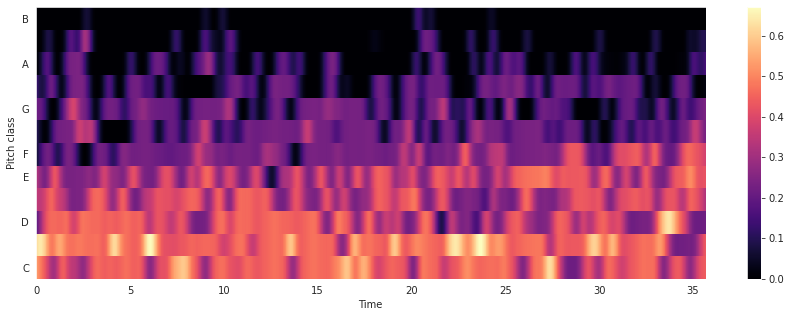

In [62]:
#Chroma Energy Normalized (CENS)
chroma = librosa.feature.chroma_cens(y=y_harmonic, sr=sr)
plt.figure(figsize=(14, 5))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()

In [ ]:
"""
Мел-кепстральные коэффициенты (MFCC)


Мел-кепстральные коэффициенты — один из важнейших признаков в обработке аудио. MFCC — это матрица значений, которая захватывает тембральные аспекты.

MFCC - Представляют собой набор признаков , которые описывают общую форму спектральной огибающей. Они моделируют характеристики человеческого голоса. MFCC - коэффициенты частотной капсулы, суммируют частотное распределение по размеру окна. Поэтому можно анализировать как частотные, так и временные характеристики звука. Перед построением графика коэффициенты нормализуются.
"""

Text(0.5, 1.0, 'MFCC')

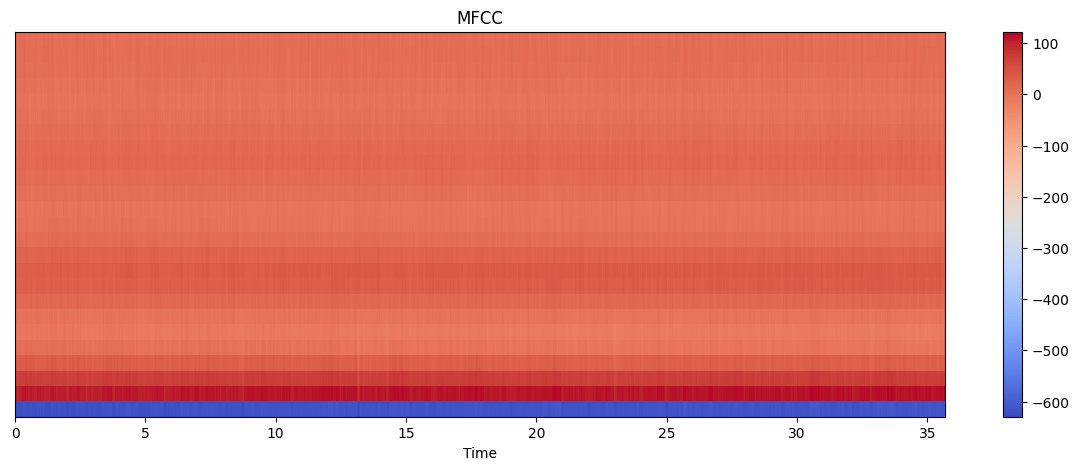

In [20]:
# Calculate MFCCs
mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=25)
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')

In [24]:
print(mfccs.shape)

(25, 1537)


In [ ]:
"""
Спектрограмма
Спектрограмма - это визуальный способ представления уровня или “громкости” сигнала во времени на различных частотах, присутствующих в форме волны. Обычно изображается в виде тепловой карты. .stft() преобразует данные в кратковременное преобразование Фурье. С помощью STFT можно определить амплитуду различных частот, воспроизводимых в данный момент времени аудиосигнала.
"""

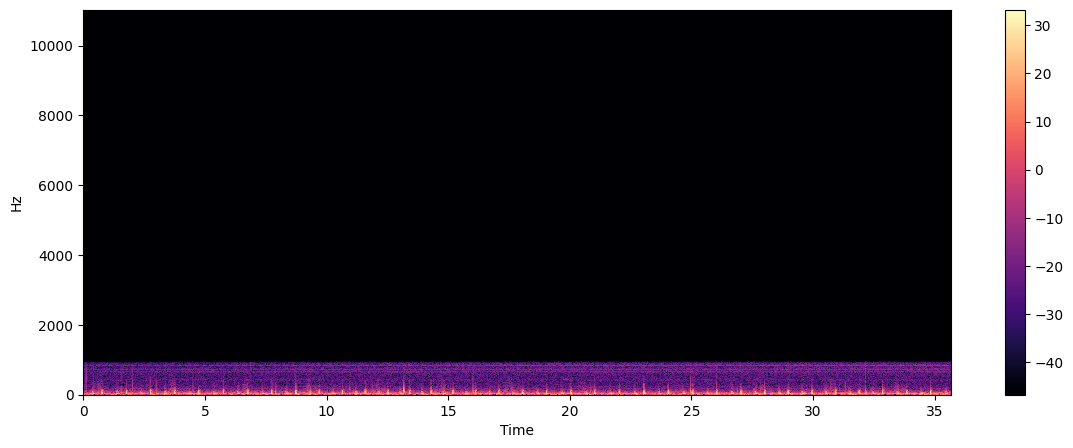

In [35]:
y_stft = librosa.stft(y)
y_stft_db = librosa.amplitude_to_db(abs(y_stft))
plt.figure(figsize=(14, 5))
librosa.display.specshow(y_stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [ ]:
"""
Поскольку все действие происходит в нижней части спектра, мы можем преобразовать ось частот в логарифмическую:
"""

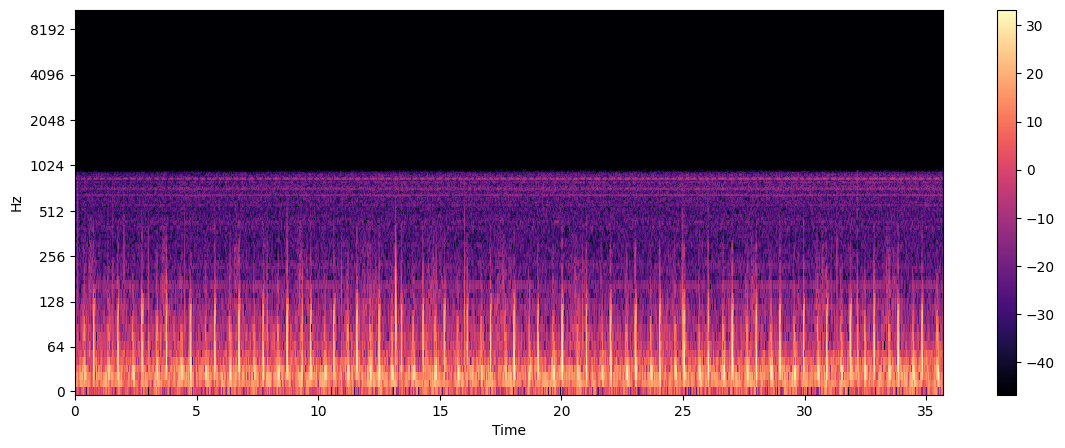

In [36]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(y_stft_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
"""
Спектральный центроид - Spectral Centroid.


Указывает, на какой частоте сосредоточена энергия спектра или, другими словами, указывает, где расположен “центр масс” для звука. librosa.feature.spectral_centroid вычисляет спектральный центроид для каждого фрейма в сигнале:
"""

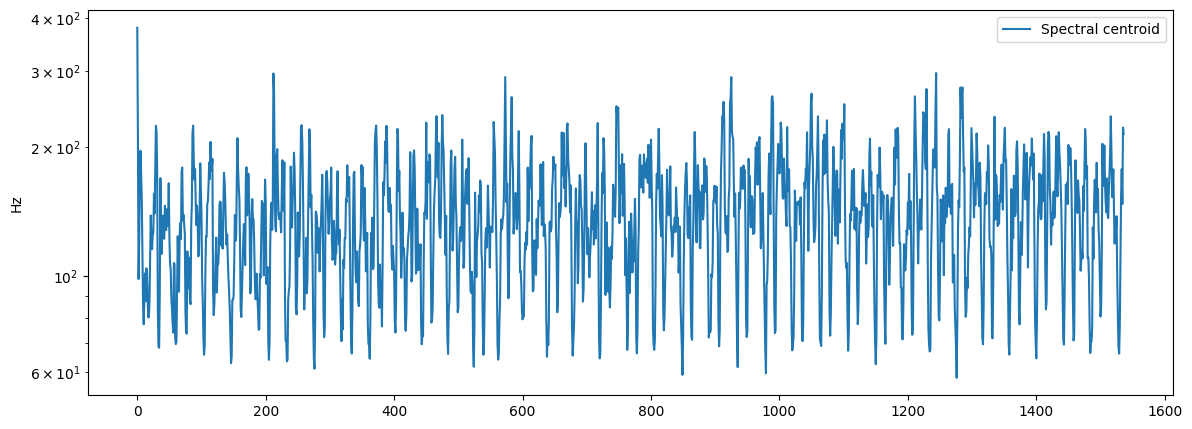

In [39]:
# Spectral Centroid
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
plt.figure(figsize=(14, 5))
plt.semilogy(centroid.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.legend()

In [ ]:
"""
Построение спектрального центроида вместе с формой волны:
"""

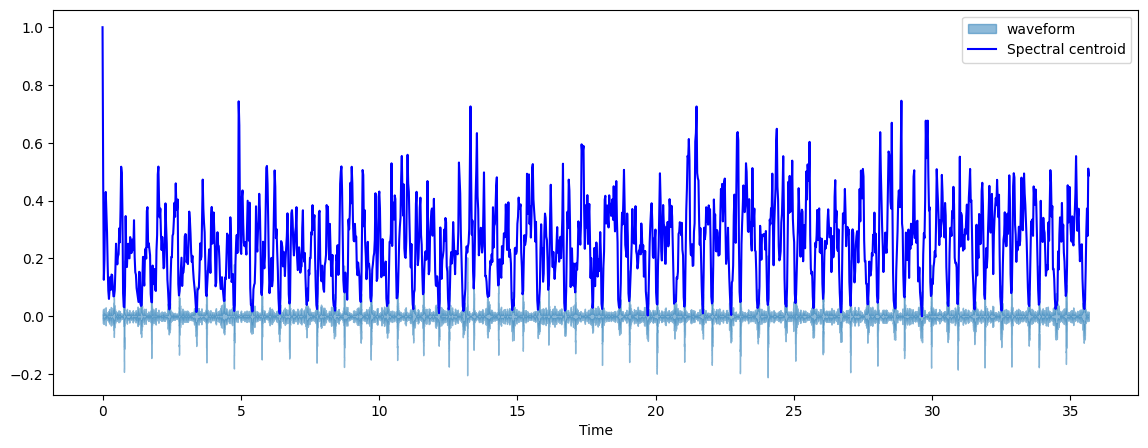

In [47]:
# Функция для нормализации спектрального центроида
def normalize(input_array, axis=0):
    return sklearn.preprocessing.minmax_scale(input_array, axis=axis)


centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
audio_frames = range(len(centroid))

split_audio = librosa.frames_to_time(audio_frames)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.5, label='waveform')
plt.plot(split_audio, normalize(centroid), color='b', label='Spectral centroid')
plt.legend()

In [ ]:
"""
Спектральный контраст - Spectral Contrast


Каждый кадр спектрограммы  S делится на поддиапазоны. Для каждого поддиапазона энергетический контраст оценивается путем сравнения средней энергии в верхнем квантиле (энергия пика) со средним значением энергии в нижнем квантиле (энергия впадины). Высокие значения контрастности обычно соответствуют четким узкополосным сигналам, а низкие значения контрастности соответствуют широкополосным шумам.
"""

Text(0.5, 1.0, 'Спектральный контраст')

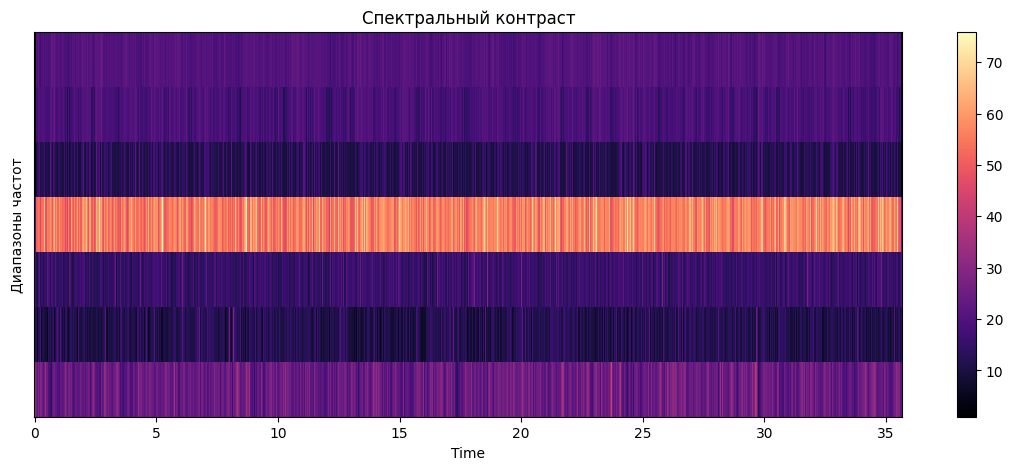

In [50]:
# Spectral Contrast
contrast = librosa.feature.spectral_contrast(y=y_harmonic, sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Диапазоны частот')
plt.title('Спектральный контраст')

In [ ]:
"""
Спектральный спад - Spectral Rolloff.


Это мера формы сигнала, представляющая собой частоту, в которой высокие частоты снижаются до 0. Чтобы получить ее, нужно рассчитать долю элементов в спектре мощности, где 85% ее мощности находится на более низких частотах. librosa.feature.spectral_rolloff вычисляет частоту спада для каждого фрейма в сигнале:
"""

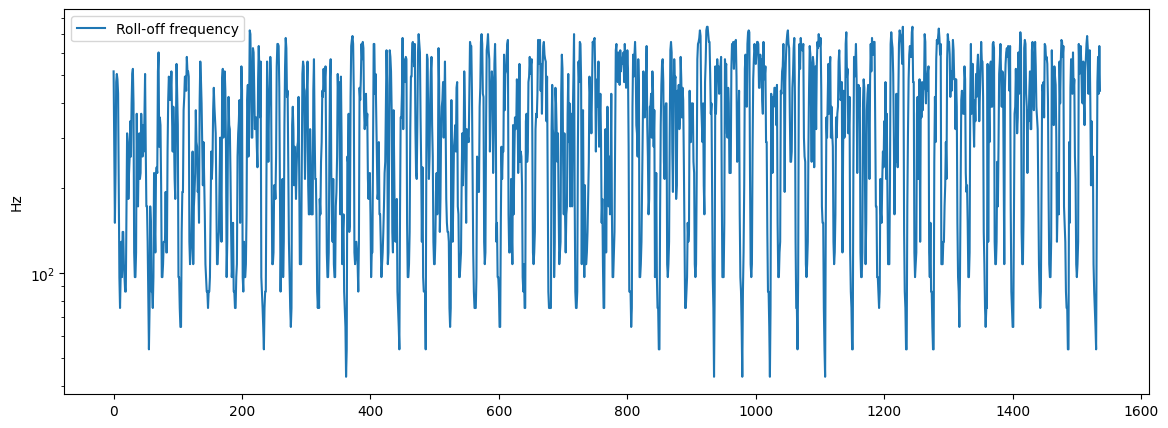

In [52]:
# Spectral Rolloff
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
plt.figure(figsize=(14, 5))
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.legend()

In [ ]:
"""
Построение спектрального спада вместе с формой волны:
"""

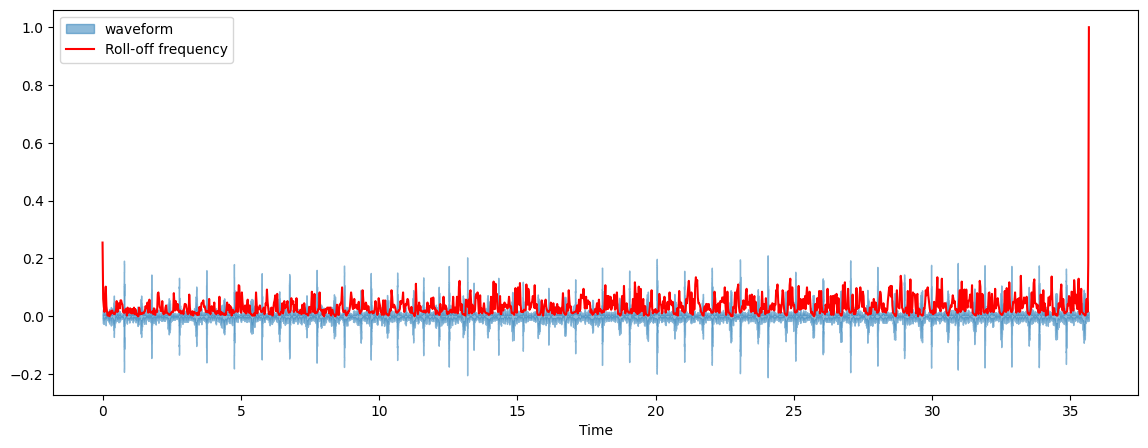

In [55]:
rolloff = librosa.feature.spectral_rolloff(y=(y + 0.01), sr=sr)[0]
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.5, label='waveform')
plt.plot(split_audio, normalize(rolloff), color='r', label='Roll-off frequency')
plt.legend()

In [ ]:
"""
Спектральная ширина - Spectral bandwidth.


Спектральная ширина определяется как ширина полосы света на половине максимальной точки. Спектральная полоса пропускания в кадре t. Результат - полоса частот для каждого кадра.
"""

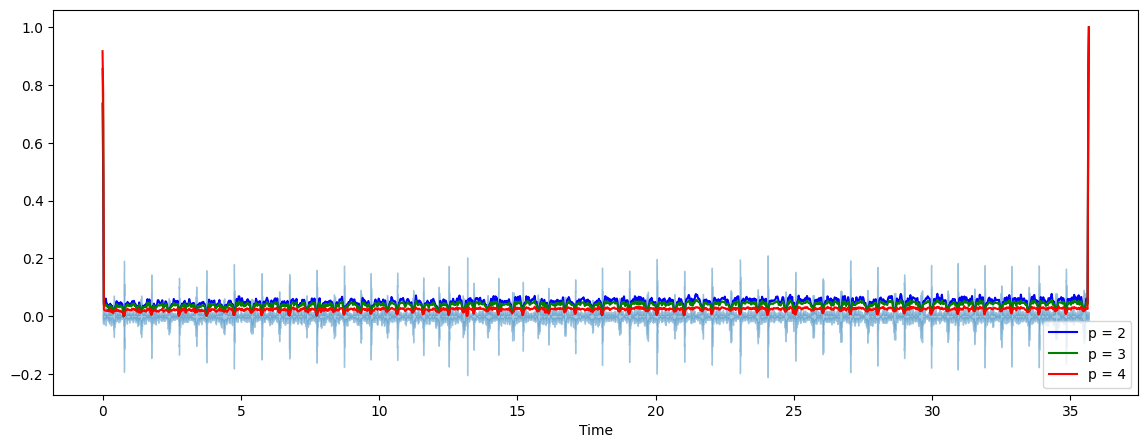

In [59]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=(y + 0.01), sr=sr, p=2)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=(y + 0.01), sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=(y + 0.01), sr=sr, p=4)[0]
plt.figure(figsize=(14, 5))
plt.plot(split_audio, normalize(spectral_bandwidth_2), color='b')
plt.plot(split_audio, normalize(spectral_bandwidth_3), color='g')
plt.plot(split_audio, normalize(spectral_bandwidth_4), color='r')
plt.legend(('p = 2', 'p = 3', 'p = 4'))
librosa.display.waveshow(y, sr=sr, alpha=0.4)

In [ ]:
"""
Скорость пересечения нуля - Zero Crossing Rate


Простой способ измерения гладкости сигнала — вычисление числа пересечений нуля в пределах сегмента этого сигнала. Голосовой сигнал колеблется медленно. Например, сигнал 100 Гц будет пересекать ноль 100 раз в секунду, тогда как “немой” фрикативный сигнал может иметь 3000 пересечений нуля в секунду.
"""

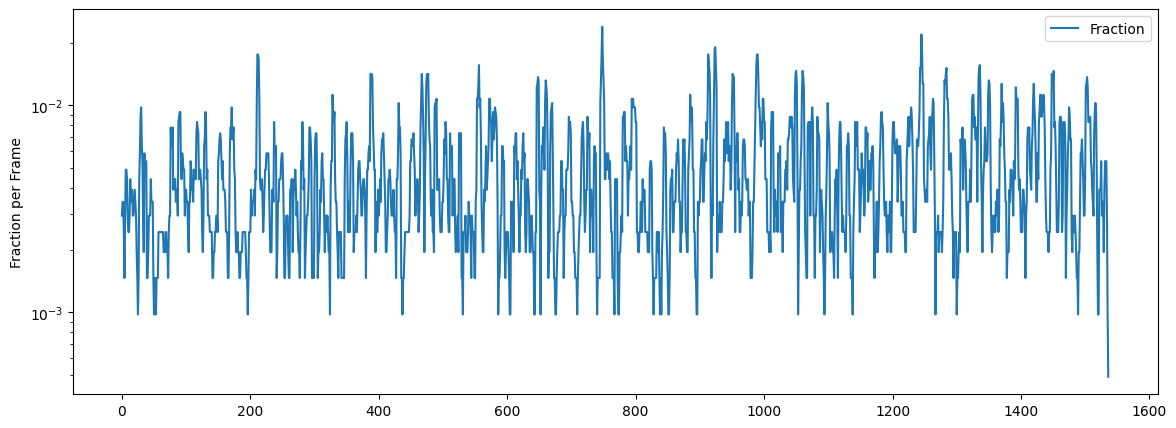

In [62]:
# Zero Crossing Rate
zc_rate = librosa.feature.zero_crossing_rate(y_harmonic)
plt.figure(figsize=(14, 5))
plt.semilogy(zc_rate.T, label='Fraction')
plt.ylabel('Fraction per Frame')
plt.legend()

In [ ]:
"""
Скорость пересечения нуля - Zero Crossing Rate (увеличенный масштаб):
"""

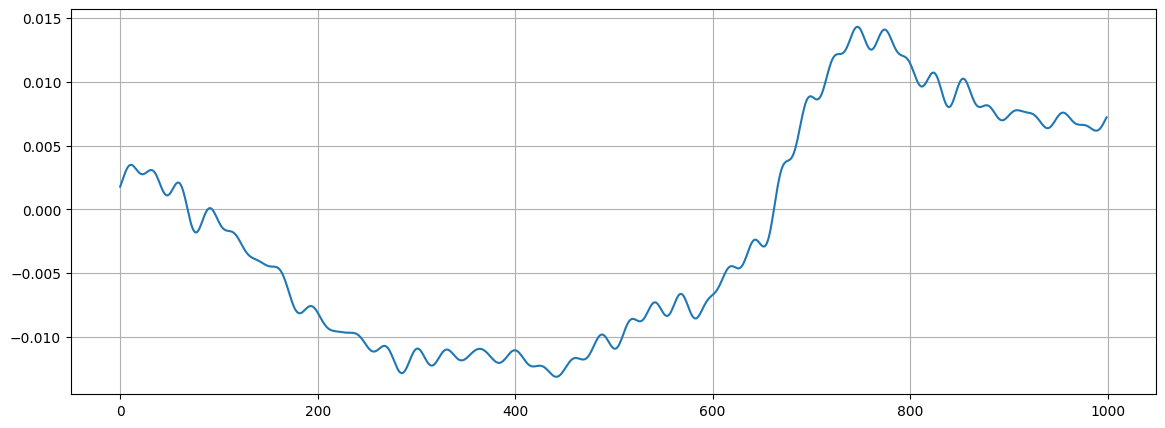

In [72]:
n0 = 11_000
n1 = 12_000
plt.figure(figsize=(14, 5))
plt.plot(y[n0:n1])
plt.grid()

In [ ]:
"""
Вычисление числа пересечений нуля:
"""

In [74]:
zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
print(sum(zero_crossings))

4


In [9]:
def merge_arg_sort(value: np.ndarray) -> np.ndarray:
    n = len(value)
    index_temp = np.zeros((n,), np.int32)
    index = np.arange(n)

    h = 1
    status = 0
    while h <= n:
        for j in range(0, n - h, 2 * h):
            ls = j
            le = j + h - 1
            rs = j + h
            re = j + 2 * h - 1 if j + 2 * h - 1 < n - 1 else n - 1
            # for k in range(ls, re + 1):
            index_temp[ls:re + 1] = index[ls:re + 1]
            i = ls
            j = rs
            for k in range(ls, re + 1):
                if i <= le and j <= re:
                    if value[index_temp[j]] == value[index_temp[i]]: status = 0
                    if value[index_temp[j]] < value[index_temp[i]]: status = -1
                    if value[index_temp[j]] > value[index_temp[i]]: status = 1
                if i > le: status = -1
                if j > re: status = 1

                if status >= 0:
                    index[k] = index_temp[i]
                    i += 1
                else:
                    index[k] = index_temp[j]
                    j += 1
        h *= 2
    return index


In [31]:
def coincident(max_coincident=1):
    def coincident_decorator(func):
        def wrapper(*args, **kwargs):
            coincident_num = 1
            extreme = func(*args, **kwargs)
            while coincident_num < max_coincident:
                kwargs['eps'] += 1
                recalculated_extreme = func(*args, **kwargs)
                if len(extreme) == len(recalculated_extreme):
                    coincident_num += 1
                else:
                    extreme = recalculated_extreme
                    coincident_num = 1
            return extreme, kwargs['eps']

        return wrapper

    return coincident_decorator


@coincident(2)
def extremal_min(*, index: np.ndarray, eps: int) -> np.ndarray:
    n, extreme_min = len(index), []
    for k in range(n):
        for l in range(1, k + 1):
            if abs(index[k] - index[k - l]) <= eps:
                break
        else:
            extreme_min.append(index[k])
    return extreme_min


@coincident(2)
def extremal_max(*, index: np.ndarray, eps: int) -> np.ndarray:
    n, extreme_max = len(index), []
    for k in range(n):
        for l in range(1, (n - k)):
            if abs(index[k] - index[k + l]) <= eps:
                break
        else:
            extreme_max.append(index[k])
    return extreme_max

In [32]:
array = np.random.randint(-100, 100, 50)

In [33]:
e = merge_arg_sort(array)

In [36]:
ext_min, epsilon = extremal_min(index=e, eps=4)
epsilon

5

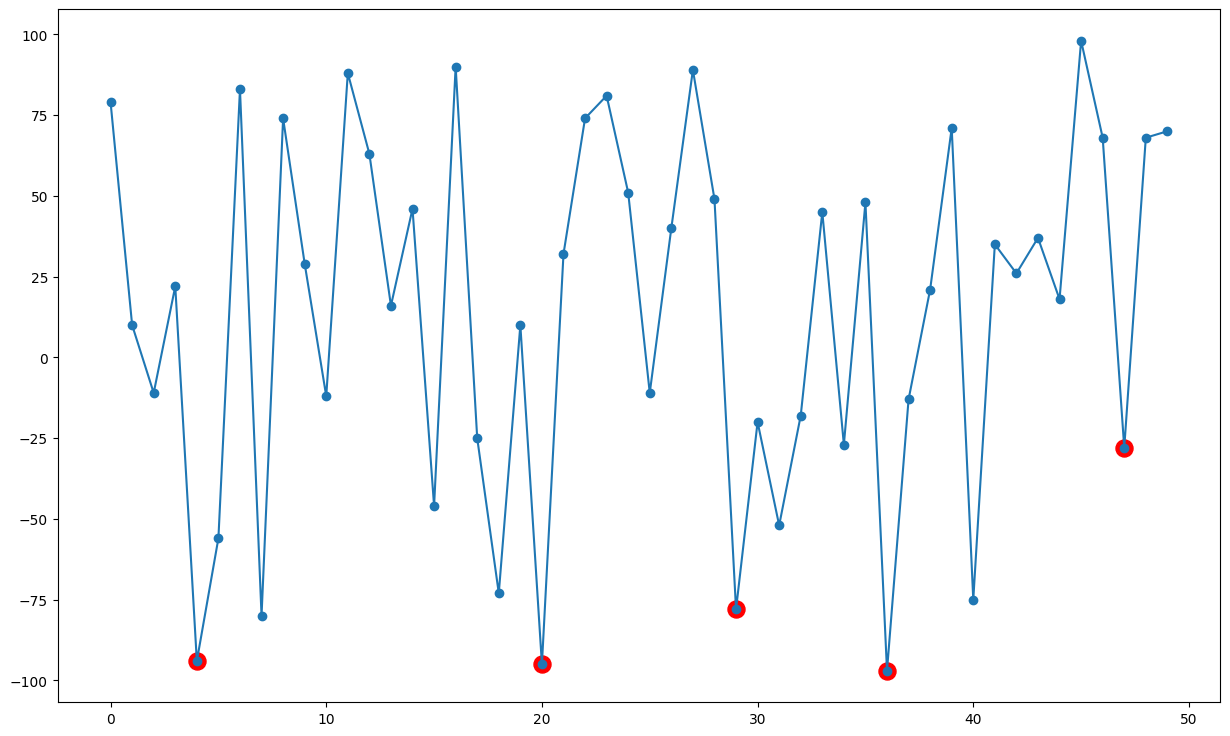

In [37]:
plt.figure(figsize=(15, 9))
plt.plot(array, marker='o')
plt.scatter(ext_min, array[ext_min], marker='o', color='r', s=150)

In [5]:
def coincident(max_coincident=1):
    def coincident_decorator(func):
        def wrapper(*args, **kwargs):
            coincident_num = 1
            extreme = func(*args, **kwargs)
            while coincident_num < max_coincident:
                kwargs['eps'] += 1
                recalculated_extreme = func(*args, **kwargs)
                if len(extreme) == len(recalculated_extreme):
                    coincident_num += 1
                else:
                    extreme = recalculated_extreme
                    coincident_num = 1
            return extreme, kwargs['eps']

        return wrapper

    return coincident_decorator

In [22]:
@coincident(5)
def extremal_min(*, index: np.ndarray, eps: int) -> np.ndarray:
    n, extreme_min = len(index), []
    for k in range(n):
        for l in range(1, k + 1):
            if abs(index[k] - index[k - l]) <= eps:
                break
        else:
            extreme_min.append(index[k])
    return extreme_min


@coincident(5)
def extremal_max(*, index: np.ndarray, eps: int) -> np.ndarray:
    n, extreme_max = len(index), []
    for k in range(n):
        for l in range(1, (n - k)):
            if abs(index[k] - index[k + l]) <= eps:
                break
        else:
            extreme_max.append(index[k])
    return extreme_max

In [19]:
path = "../data_training/training-a/a0001.wav"
y, sr = librosa.load(path, mono=True, duration=5)

print(f'Тип y: {type(y)} sr: {type(sr)}')
print(f'Размер аудиофайла: {y.shape}, {sr}')
print(f'Переменные: {y}, {sr}')

print(f'Аудио: {y}')

Тип y: <class 'numpy.ndarray'> sr: <class 'int'>
Размер аудиофайла: (110250,), 22050
Переменные: [-0.00204706 -0.00228845 -0.00252952 ...  0.00204329  0.00143569
  0.00088054], 22050
Аудио: [-0.00204706 -0.00228845 -0.00252952 ...  0.00204329  0.00143569
  0.00088054]


In [26]:
y1 = y[:50_000]
e = merge_arg_sort(y1)
print(e)

[17365 17366 16913 ... 17089 17087 17088]


In [28]:
%%time
index_min, eps_min = extremal_min(index=e, eps=90)
print(index_min, eps_min)

[17365, 16913, 39196, 38756, 30799, 9038, 31457, 27937, 16731, 2431, 39415, 17565, 30012, 42314, 972, 33172, 34399, 9930, 8250, 7690, 44538, 21385, 38546, 26373, 40990, 12737, 19096, 7139, 4931, 29225, 6216, 4667, 40703, 47277, 49096, 6030, 26605, 37256, 29014, 24604, 32246, 13129, 45270, 11442, 11285, 23816, 3787, 19937, 23213, 14108, 22308, 20186, 35809, 47982, 22158, 13900, 39781, 43100, 24998, 18117, 19746, 37627, 44081, 25109, 10797, 43948, 49968, 18488, 47681, 46560, 35362, 15603, 15211, 14, 49844, 41393, 18674, 13554, 38280, 14685, 45980, 3305, 15737, 48730, 45828, 43635, 15970, 44878, 36280, 13421, 17954, 16145, 34943, 25390, 17772, 20616, 2971, 12236, 22837, 1839, 33624, 11988, 25687, 8505, 20832, 1708, 10428, 27187, 27011] 95
CPU times: user 8.06 s, sys: 9 µs, total: 8.06 s
Wall time: 8.16 s
